In [1]:
library(ggplot2)
options(repr.plot.height=4,repr.plot.width=6)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


Cargar los datos en un dataframe llamado: airbnb

In [2]:
airbnb<-read.csv('airbnb.csv',sep = ',', stringsAsFactors = T)

Mostrar las primeras 6 filas del dataframe

In [3]:
head(airbnb,6) #otra manera airbnb[0:6,]

Zipcode,Neighbourhood.Cleansed,Property.Type,Room.Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed.Type,Amenities,Square.Feet,Price,Review.Scores.Rating
28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


Renombrar las columnas de la siguiente forma:

| Nombre original | Nuevo nombre |
| - | - |
| Zipcode | CodigoPostal |
| Neighbourhood.Cleansed | Barrio |
| Property.Type	| TipoPropiedad |
| Room.Type | TipoAlquiler |
| Accommodates | MaxOcupantes |
| Bathrooms	| NumBanyos |
| Bedrooms	| NumDormitorios |
| Beds	|  NumCamas |
| Bed.Type	| TipoCama |
| Amenities | Comodidades |
| Square.Feet | PiesCuadrados |
| Price	| Precio |
| Review.Scores.Rating | Puntuacion |

In [4]:
newnames<-c("CodigoPostal","Barrio","TipoPropiedad","TipoAlquiler","MaxOcupantes","NumBanyos",
"NumDormitorios","NumCamas","TipoCama","Comodidades","PiesCuadrados","Precio","Puntuacion")
colnames(airbnb) <- c(newnames)
airbnb[0:1,]

CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion
28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA


Crea una nueva columna llamada MetrosCuadrados a partir de la columna PiesCuadrados.

Ayuda: 1 pie cuadrado son 0,092903 metros cuadrdados

In [5]:
airbnb$MetrosCuadrados <- (airbnb[,c("PiesCuadrados")]*0.092903)
airbnb[1:6,c("PiesCuadrados","MetrosCuadrados")]
airbnb[5,]

PiesCuadrados,MetrosCuadrados
NA,NA
NA,NA
NA,NA
NA,NA
538,49.98181
NA,NA


,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90,49.98181


Miremos el código postal. Es una variable con entradas erroneas.
Hay valores como '', '-'  y '28' que deberían ser considerados como NA.
Así mismo también debería ser NA todos los que no compiencen por 28, ya que estamos con códigos postales de Madrid

El código postal 28002, 28004 y 28051 tienen entradas repetidas. 
Por ejemplo las entradas 28002\n20882 deberían ir dnetro de 28002

El codigo 2804 debería ser 28004, 2805 deberia ser 28005 y 2815 juncto con 2815 debería ser 28015

Limpia los datos de la columna Codigo Postal

In [6]:
airbnb$CodigoPostal[airbnb$CodigoPostal=='-'] <- NA
airbnb$CodigoPostal[airbnb$CodigoPostal==''] <- NA
airbnb$CodigoPostal[airbnb$CodigoPostal=='"'] <- NA
airbnb$CodigoPostal[airbnb$CodigoPostal==28] <- NA
airbnb$CodigoPostal[airbnb$CodigoPostal==27013] <- NA
airbnb$CodigoPostal[airbnb$CodigoPostal==27004] <- NA
airbnb$CodigoPostal[airbnb$CodigoPostal==25008] <- NA
airbnb$CodigoPostal[airbnb$CodigoPostal==2015] <- NA
airbnb$CodigoPostal[airbnb$CodigoPostal==20126] <- NA
airbnb$CodigoPostal[airbnb$CodigoPostal==20013] <- NA
airbnb$CodigoPostal[airbnb$CodigoPostal=='Madrid 28004'] <- NA
airbnb$CodigoPostal[airbnb$CodigoPostal=='28002\n28002'] <-  28002
airbnb$CodigoPostal[airbnb$CodigoPostal=='28051\n28051'] <-  28052
airbnb$CodigoPostal[airbnb$CodigoPostal==2804] <-  28004
airbnb$CodigoPostal[airbnb$CodigoPostal==2805] <-  28005
airbnb$CodigoPostal[airbnb$CodigoPostal==2815] <-  28015
table(airbnb$CodigoPostal)
airbnb$CodigoPostal


                        -        20013        20126         2015        25008 
           0            0            0            0            0            0 
       27004        27013           28        28001       280013        28002 
           0            0            0          231            1          171 
28002\n28002        28003        28004        28005        28006        28007 
           0          185         1795         1195          218          206 
       28008        28009        28010        28011        28012        28013 
         338          216          384          250         2060         1019 
       28014        28015        28016        28017        28018        28019 
         630          601           76          107           43          200 
       28020        28021        28022        28023        28024        28025 
         192           58           30           23           44          123 
       28026        28027        28028        28029

[1] 28004  28004  28004  28004  28015  28004  28004  28004  28015  28004 
   [11] 28004  28004  28013  28005  28013  28013  28013  28012  28013  28013 
   [21] 28013  28005  28013  28012  28012  28013  28014  28013  28012  28005 
   [31] 28005  28005  28005  28012  28005  28005  28045  28005  28005  28005 
   [41] 28005  28005  28013  28013  28013  28013  28013  28012  28013  28012 
   [51] 28013  28013  28013  28012  28013  28013  28012  <NA>   <NA>   28045 
   [61] 28045  28045  28045  28045  28045  28045  28045  28045  28045  28045 
   [71] 28045  28012  28045  28045  28045  28045  28012  28012  28012  28012 
   [81] 28005  28012  <NA>   28005  28012  28012  28012  28012  28012  28005 
   [91] 28012  28005  28005  28012  28005  28012  28012  28005  28005  28005 
  [101] 28012  28012  28005  28012  28014  28014  28014  28014  28012  28014 
  [111] 28014  28014  28012  28014  28014  28014  28014  28014  28012  28012 
  [121] 28014  28012  28012  28005  28012  28012  28012  28012  28012  28005 
  [131] 28005  <NA>   28012  <NA>   28012  28012  28012  28005  28012  28012 
  [141] 28014  28014  28045  28045  28045  28045  28007  28007  28007  28007 
  [151] 28007  28007  28028  28009  28009  28009  28009  28014  28014  28007 
  [161] 28005  28013  28005  28005  28013  28013  28013  28005  28013  28013 
  [171] 28005  28005  28005  28013  28013  28013  28005  28013  28005  28013 
  [181] 28013  28005  28013  28005  28013  28013  28005  28005  28013  28013 
  [191] 28005  28013  28005  28013  28005  28013  28005  28005  28005  28005 
  [201] 28005  28013  28005  28005  28005  28013  28013  28012  28005  28012 
  [211] 28005  28012  28005  28012  28012  28005  28012  28005  28012  28012 
  [221] 28012  28012  28012  28012  28012  28012  28012  28013  28013  28014 
  [231] 28012  28012  28012  28005  28005  28005  28012  28012  28005  28012 
  [241] 28012  28012  28012  28012  28012  28012  28014  28014  28014  28014 
  [251] 28012  28014  28014  28014  28014  28004  28004  28004  28004  28004 
  [261] 28004  28004  28004  28004  28004  28001  28001  28006  28001  28001 
  [271] 28001  28001  28001  28001  28001  28006  28009  <NA>   28009  28009 
  [281] 28009  28006  28009  28006  28006  <NA>   28028  <NA>   28028  28028 
  [291] 28004  28004  28004  28004  28004  28004  28004  28004  28004  28004 
  [301] 28004  28004  28004  28004  28004  28004  28004  28004  28004  28004 
  [311] 28004  28004  28015  28004  28004  28004  28015  28004  28004  28015 
  [321] 28004  28004  28004  28004  28004  28013  28015  28004  28015  28004 
  [331] 28004  28004  28015  28004  28004  28004  28015  28015  28015  28015 
  [341] 28015  28015  28015  28010  28015  28010  28010  28010  28010  28010 
  [351] 28010  28010  28004  28010  28010  28010  28028  28028  28028  28028 
  [361] 28006  28006  28006  28006  28002  28002  28006  28002  28002  28034 
  [371] 28050  28008  28011  28011  28049  28038  28053  28038  28047  28011 
  [381] 28011  28011  28011  28011  28011  28011  28047  28011  28011  28011 
  [391] 28011  <NA>   28025  28019  28019  28024  28019  28019  28019  28019 
  [401] 28019  <NA>   28025  28019  28002  28002  28002  28016  28016  28036 
  [411] 28016  28016  28016  28036  28016  28046  28039  28039  28020  28020 
  [421] 28020  28020  28020  28020  28003  28029  28029  28029  28020  28015 
  [431] 28015  28015  28015  28015  28015  28015  28015  28015  28015  28010 
  [441] 28003  28003  28003  28003  28003  28003  28029  28008  28008  28008 
  [451] 28008  28008  28015  28008  28008  28008  28008  28008  28008  28008 
  [461] 28008  28025  28025  28025  28054  28025  28041  28041  28026  28026 
  [471] 28026  28038  28053  28058  28053  28053  28018  28018  28018  28053 
  [481] 28053  28030  28030  28030  28017  28017  28027  28027  28027  28027 
  [491] 28027  28027  28027  28027  28027  28043  28033  28043  28043  28033 
  [501] 28033  28033  28033  28033  28033  28041  28050  28055  28021  28041 
  [511] 28032  28032  2803

Una vez limpios los datos ¿Cuales son los códigos postales que tenemos? 

In [7]:
#table(airbnb$CodigoPostal)
#airbnb[, "CodigoPostal"]
unique(airbnb$CodigoPostal)
airbnb[!is.na(airbnb$CodigoPostal),]

[1] 28004  28015  28013  28005  28012  28014  28045  <NA>   28007  28028 
[11] 28009  28001  28006  28010  28002  28034  28050  28008  28011  28049 
[21] 28038  28053  28047  28025  28019  28024  28016  28036  28046  28039 
[31] 28020  28003  28029  28054  28041  28026  28058  28018  28030  28017 
[41] 28027  28043  28033  28055  28021  28032  28037  28022  28042  28094 
[51] 280013 28035  28040  28031  28044  28105  28023  28051  28052  28850 
[61] 28048  28056  28060 
77 Levels:  - 20013 20126 2015 25008 27004 27013 28 28001 280013 ... Madrid 28004

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96,NA
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91,NA
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100,NA
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90,49.98181
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95,NA
7,28004,Universidad,House,Private room,7,5,1,7,Real Bed,"Internet,Wireless Internet,Kitchen,Smoking allowed,Heating,Fire extinguisher,Shampoo,Lock on bedroom door,Hangers,Hair dryer,Iron,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,77,NA
8,28004,Universidad,Apartment,Entire home/apt,3,1,1,NA,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Washer",NA,70,84,NA
9,28015,Universidad,Apartment,Entire home/apt,2,1,1,1,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Dryer,Essentials,Shampoo,translation missing: en.hosting_amenity_49",700,90,98,65.03210
10,28004,Universidad,Apartment,Entire home/apt,4,2,2,2,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Hot tub,Heating,Family/kid friendly,Washer,Dryer,Essentials,Hair dryer,Iron",NA,155,NA,NA


¿Cuales son los 5 códigos postales con más entradas? ¿Y con menos? ¿Cuantas entradas tienen?

In [8]:
#Top 5 de codigos postales con más entradas:
#summary(airbnb)
CPmas_entrada <- sort(table(airbnb$CodigoPostal), decreasing=T)
CPmas_entrada[1:5]
#todos los valores:
CPmenos_entrada <- sort(table(airbnb$CodigoPostal), decreasing=F)
CPmenos_entrada[16:20] #A partir de esos elementos ya no se toma en cuentas los NA.
#CPmenos_entradas[5:1]


28012 28004 28005 28013 28014 
 2060  1795  1195  1019   630 


280013  28048  28056  28058  28060 
     1      1      1      1      1 

¿Cuales son los barrios que hay en el código postal 28012?

In [9]:
#airbnb[,c("Barrio","CodigoPostal")
Barrio_relacionCP <- airbnb$Barrio[airbnb$CodigoPostal==28012]
sort(unique(Barrio_relacionCP), decreasing=F)

[1] Acacias         Arapiles        Atocha          Cortes         
 [5] Delicias        Embajadores     Goya            Palacio        
 [9] Palos de Moguer Sol             Universidad    
125 Levels: Abrantes Acacias Adelfas Aeropuerto Aguilas ... ZofÃ­o

¿Cuantas entradas hay en cada uno de esos barrios para el codigo postal 28012?

In [10]:
Barrio_relacionCP <- airbnb$Barrio[airbnb$CodigoPostal==28012]
sort(table(Barrio_relacionCP), decreasing=T)[1:11]

Barrio_relacionCP
    Embajadores             Sol          Cortes Palos de Moguer         Palacio 
           1449             301             216              46              27 
        Acacias     Universidad        Arapiles          Atocha        Delicias 
             13               4               1               1               1 
           Goya 
              1 

¿Cuantos barrios hay en todo el dataset airbnb? ¿Cuales son?

In [11]:
paste('El numero de Barrios en el DataSet son: ', length(unique(airbnb$Barrio)))
paste('El numero de total de Barrios por codigo postal en el DataSet son: ', length(airbnb$Barrio))
#table((airbnb$Barrio))
table(factor(airbnb$Barrio))

[1] "El numero de Barrios en el DataSet son:  125"

[1] "El numero de total de Barrios por codigo postal en el DataSet son:  13207"


                      Abrantes                        Acacias 
                            18                            145 
                       Adelfas                     Aeropuerto 
                            51                              6 
                       Aguilas               Alameda de Osuna 
                            15                             24 
                       Almagro                       Almenara 
                           155                             62 
                   Almendrales                         Aluche 
                            45                             45 
                        Ambroz                        Amposta 
                            12                              5 
              Apostol Santiago                       Arapiles 
                            15                            182 
                       Aravaca                          Arcos 
                            16                        

¿Cuales son los 5 barrios que tienen mayor número entradas?

In [12]:
#sort(table(airbnb$Barrio), decreasing=T)
sort(table(airbnb$Barrio), decreasing=T)[1:5]


Embajadores Universidad     Palacio         Sol    Justicia 
       1844        1358        1083         940         785 

¿Cuantos Tipos de Alquiler diferentes hay? ¿Cuales son? ¿Cuantas entradas en el dataframe hay por cada tipo?

In [13]:
summary(airbnb$TipoAlquiler)
paste('¿Cuantos Tipos de Alquiler diferentes hay?: ', length(unique(airbnb$TipoAlquiler)))
paste(' ¿Cuales son?: ')
unique(airbnb$TipoAlquiler)
paste('¿Cuantas entradas en el dataframe hay por cada tipo?: ')
table(airbnb$TipoAlquiler)

Entire home/apt    Private room     Shared room 
           7903            5113             191

[1] "¿Cuantos Tipos de Alquiler diferentes hay?:  3"

[1] " ¿Cuales son?: "

[1] Private room    Entire home/apt Shared room    
Levels: Entire home/apt Private room Shared room

[1] "¿Cuantas entradas en el dataframe hay por cada tipo?: "


Entire home/apt    Private room     Shared room 
           7903            5113             191 

Muestra el diagrama de cajas del precio para cada uno de los diferentes Tipos de Alquiler

Warning message:
"Removed 9 rows containing non-finite values (stat_boxplot)."

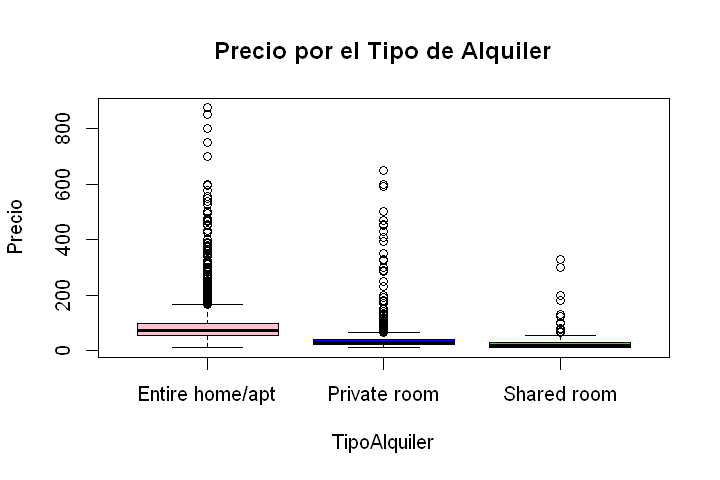

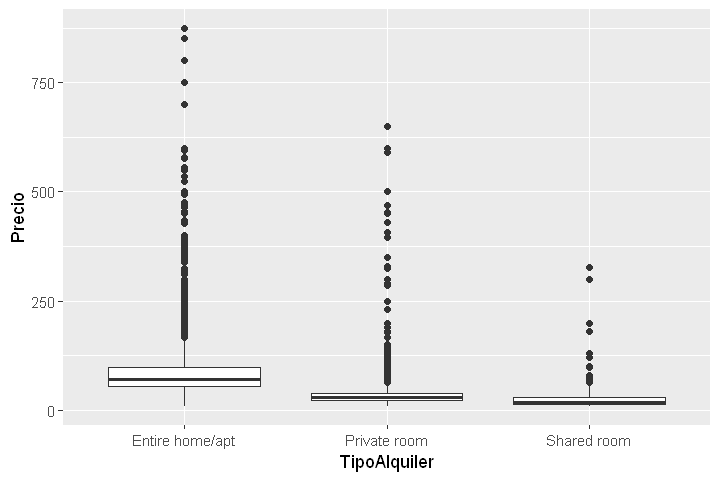

In [14]:
#plot(x = airbnb$TipoAlquiler, y = airbnb$Precio, main = "Precio por Tipo de Alquiler", xlab = "Tipo de Alquiler", ylab = "Precio", col = c("blue2", "yellow2", "green2"))
boxplot(Precio ~ TipoAlquiler, airbnb, main='Precio por el Tipo de Alquiler', col = c("pink", "blue", "green"))
ggplot(data=airbnb,aes(x=TipoAlquiler, y=Precio))+geom_boxplot()

Cual es el precio medio de alquiler de cada uno, la diferencia que hay ¿es estadísticamente significativa?
¿Con que test lo comprobarías?

In [15]:
library(tidyverse)
library(dplyr)
library(tidyr)
table(airbnb$TipoAlquiler)
airbnb%>%
    group_by(TipoAlquiler)%>%
    summarise(SumaTotal = sum(Precio, na.rm=TRUE), PrecioMedio = mean(Precio, na.rm=TRUE))

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  2.1.1       v purrr   0.3.2  
v tidyr   0.8.3       v dplyr   0.8.0.1
v readr   1.3.1       v stringr 1.4.0  
v tibble  2.1.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



Entire home/apt    Private room     Shared room 
           7903            5113             191 

TipoAlquiler,SumaTotal,PrecioMedio
Entire home/apt,689294,87.29661
Private room,175078,34.25514
Shared room,5702,29.85340


Se hace un analisis de varianza (prueba del estadistico F). Como el p-value (<2e-16) es menor de 0.05, se puede concluir que sí hay diferencias estadísticamente significativas en cuanto a el precio medio de alquiler entre los tres tipos de alquiler con un nivel de confianza del 95%.

In [16]:
summary(aov(Precio ~ TipoAlquiler, data = airbnb))

                Df   Sum Sq Mean Sq F value Pr(>F)    
TipoAlquiler     2  8981217 4490608    1828 <2e-16 ***
Residuals    13195 32417217    2457                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
9 observations deleted due to missingness

Filtra el dataframe cuyos tipo de alquiler sea  'Entire home/apt' y guardalo en un dataframe llamado 
*airbnb_entire*.
Estas serán las entradas que tienen un alquiler del piso completo.

In [17]:
airbnb_entire <- airbnb[airbnb$TipoAlquiler=='Entire home/apt',]
airbnb_entire

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96,NA
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91,NA
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100,NA
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90,49.98181
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95,NA
8,28004,Universidad,Apartment,Entire home/apt,3,1,1,NA,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Washer",NA,70,84,NA
9,28015,Universidad,Apartment,Entire home/apt,2,1,1,1,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Dryer,Essentials,Shampoo,translation missing: en.hosting_amenity_49",700,90,98,65.03210
10,28004,Universidad,Apartment,Entire home/apt,4,2,2,2,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Hot tub,Heating,Family/kid friendly,Washer,Dryer,Essentials,Hair dryer,Iron",NA,155,NA,NA
11,28004,Universidad,Apartment,Entire home/apt,4,1,1,2,Real Bed,"TV,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Essentials,Shampoo",40,70,90,3.71612
15,28013,Sol,Apartment,Entire home/apt,4,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Suitable for events,Washer,Essentials,Hangers,Hair dryer,Iron",646,75,91,60.01534


¿Cuales son los 5 barrios que tienen un mayor número de apartamentos enteros en alquiler?
Nota: Mirar solo en airbnb_entire. A partir de este punto y hasta que se diga lo contrario partiremos de airbnb_entire.

In [18]:
sort(table(airbnb_entire$Barrio), decreasing = TRUE)[1:5]


Embajadores Universidad     Palacio         Sol      Cortes 
       1228         984         769         701         574 

¿Cuales son los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros (es decir, del dataframe airbnb_entire)?

¿Cual es su precio medio?

Ayuda: Usa la función aggregate `aggregate(.~colname,df,mean,na.rm=TRUE)`

In [19]:
Precio_Medio_Barrio <- aggregate(Precio ~ Barrio, airbnb_entire, mean, na.rm = TRUE)
Precio_Medio_Barrio <- Precio_Medio_Barrio[order(Precio_Medio_Barrio$Precio, decreasing = TRUE), ]
Precio_Medio_Barrio[1:5, c("Barrio")]
Precio_Medio_Barrio[1:5,]

[1] Palomas       Fuentelareina Recoletos     El PlantÃ­o   Castellana   
125 Levels: Abrantes Acacias Adelfas Aeropuerto Aguilas ... ZofÃ­o

,Barrio,Precio
77,Palomas,309.7500
50,Fuentelareina,180.0000
93,Recoletos,161.9254
43,El PlantÃ­o,150.0000
30,Castellana,141.3889


¿Cuantos apartamentos hay en cada uno de esos barrios?

Mostrar una dataframe con el nombre del barrio, el precio y el número de entradas.

Ayuda: Podeis crear un nuevo dataframe con las columnas "Barrio" y "Freq" que contenga el número de entradas en cada barrio y hacer un merge con el dataframe del punto anterior.

In [20]:
Freq_Apt_Barrio <- aggregate(airbnb_entire$Precio, list(airbnb_entire$Barrio), length)
colnames(Freq_Apt_Barrio) <- c('Barrio', "Freq") #Renombrar
Freq_Apt_Barrio

Barrio,Freq
Abrantes,3
Acacias,61
Adelfas,33
Aeropuerto,2
Aguilas,2
Alameda de Osuna,4
Almagro,97
Almenara,25
Almendrales,18
Aluche,9


Ayuda: Podeis crear un nuevo dataframe con las columnas "Barrio" y "Freq" que contenga el número de entradas en cada barrio y hacer un merge con el dataframe del punto anterior.

In [21]:
Apt_Barrio <- merge(Precio_Medio_Barrio, Freq_Apt_Barrio, by = 'Barrio')
Apt_Barrio

Barrio,Precio,Freq
Abrantes,46.00000,3
Acacias,68.16393,61
Adelfas,68.72727,33
Aeropuerto,38.00000,2
Aguilas,54.50000,2
Alameda de Osuna,138.75000,4
Almagro,109.18557,97
Almenara,65.68000,25
Almendrales,77.50000,18
Aluche,55.88889,9


Partiendo del dataframe anterior, muestra los 5 barrios con mayor precio, pero que tengan más de 100 entradas de alquiler.

In [22]:
Apt_Barrio_100Ent <- Apt_Barrio[Apt_Barrio$Freq > 100, ]
Apt_Barrio_100Ent_5Barrios <- Apt_Barrio_100Ent[order(Apt_Barrio_100Ent$Precio, decreasing = TRUE), ]
Apt_Barrio_100Ent_5Barrios[1:5, ]

,Barrio,Precio,Freq
93,Recoletos,161.92537,135
52,Goya,111.33803,142
106,Sol,100.75036,701
108,Trafalgar,98.57848,223
59,Justicia,98.25468,534


Dibuja el diagrama de densidad de distribución de los diferentes precios. Serían 5 gráficas, una por cada barrio.

Warning message:
"Removed 1 rows containing non-finite values (stat_density)."

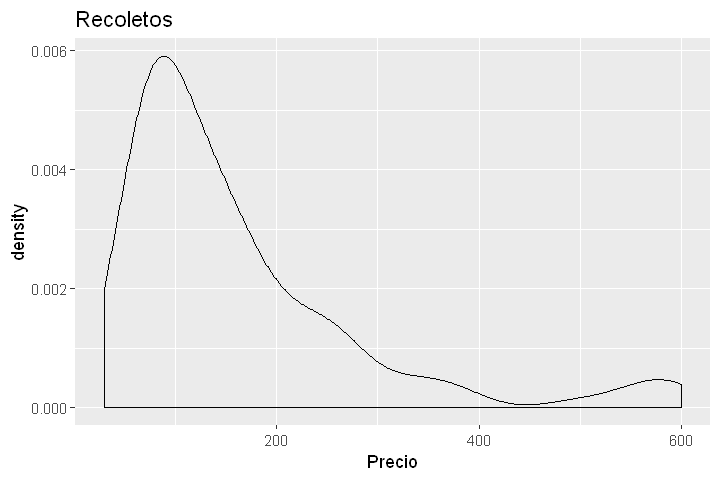

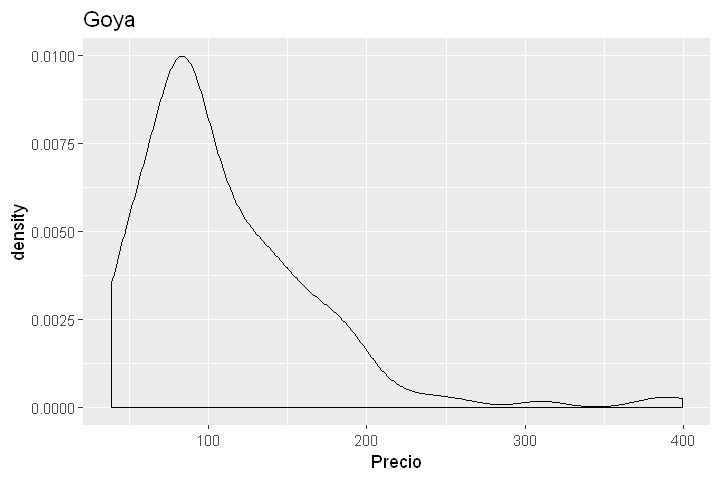

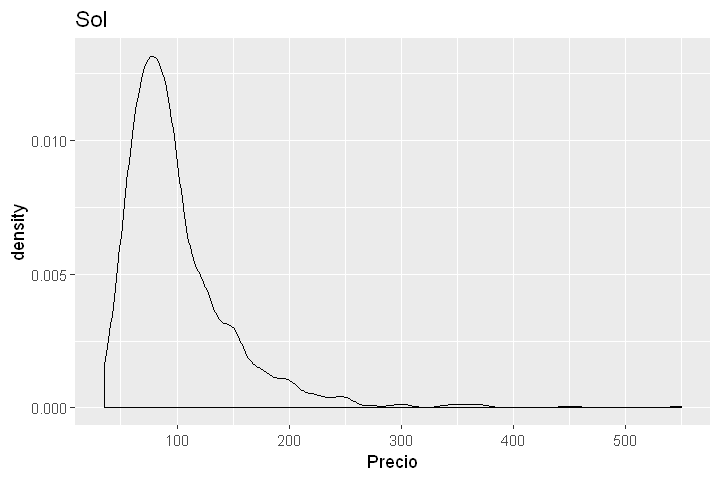

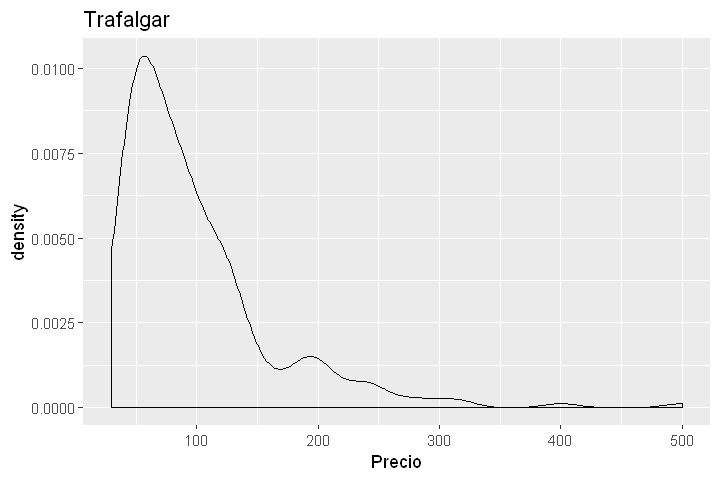

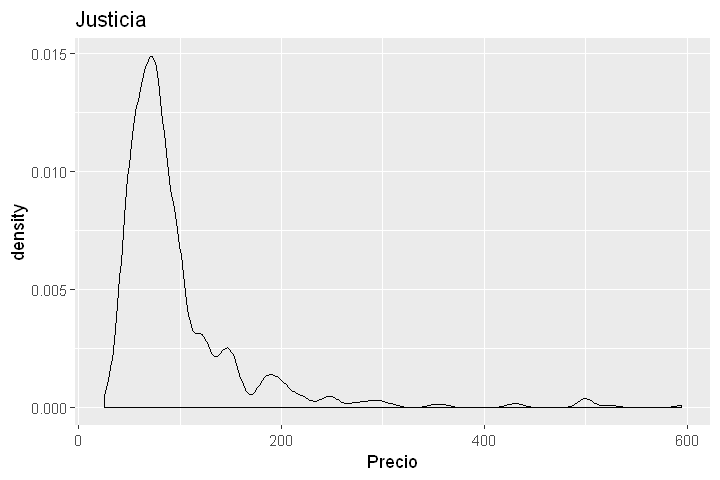

In [23]:
Recoletos <- airbnb_entire[airbnb_entire$Barrio == 'Recoletos', ]
ggplot(Recoletos, aes(x = Precio)) + geom_density() + labs(title = 'Recoletos')

Goya <- airbnb_entire[airbnb_entire$Barrio == 'Goya', ]
ggplot(Goya, aes(x = Precio)) + geom_density() + labs(title = 'Goya')

Sol <- airbnb_entire[airbnb_entire$Barrio == 'Sol', ]
ggplot(Sol, aes(x = Precio)) + geom_density() + labs(title = 'Sol')

Trafalgar <- airbnb_entire[airbnb_entire$Barrio == 'Trafalgar', ]
ggplot(Trafalgar, aes(x = Precio)) + geom_density() + labs(title = 'Trafalgar')

Justicia <- airbnb_entire[airbnb_entire$Barrio == 'Justicia', ]
ggplot(Justicia, aes(x = Precio)) + geom_density() + labs(title = 'Justicia')

Calcula el tamaño medio, en metros cuadrados, para los 5 barrios anteriores y muestralo en el mismo dataframe junto con el precio y número de entradas

In [24]:
Tamano_Apt_Barrio <- aggregate(airbnb_entire$MetrosCuadrados, list(Barrio = airbnb_entire$Barrio), mean, na.rm = TRUE)


Tamano_Apt_Barrio_5Barrios <- Tamano_Apt_Barrio[Tamano_Apt_Barrio$Barrio %in% c('Recoletos', 'Goya', 'Sol', 'Trafalgar', 'Justicia'), ]
colnames(Tamano_Apt_Barrio_5Barrios)[2] <- 'TamañoMedio'

merge(Apt_Barrio_100Ent_5Barrios, Tamano_Apt_Barrio_5Barrios, by = 'Barrio')

Barrio,Precio,Freq,TamañoMedio
Goya,111.33803,142,51.68504
Justicia,98.25468,534,28.52669
Recoletos,161.92537,135,26.66316
Sol,100.75036,701,45.61692
Trafalgar,98.57848,223,29.30426


Dibuja el diagrama de densidad de distribución de los diferentes tamaños de apartamentos. Serían 5 gráficas, una por cada barrio.

Warning message:
"Removed 132 rows containing non-finite values (stat_density)."Warning message:
"Removed 139 rows containing non-finite values (stat_density)."

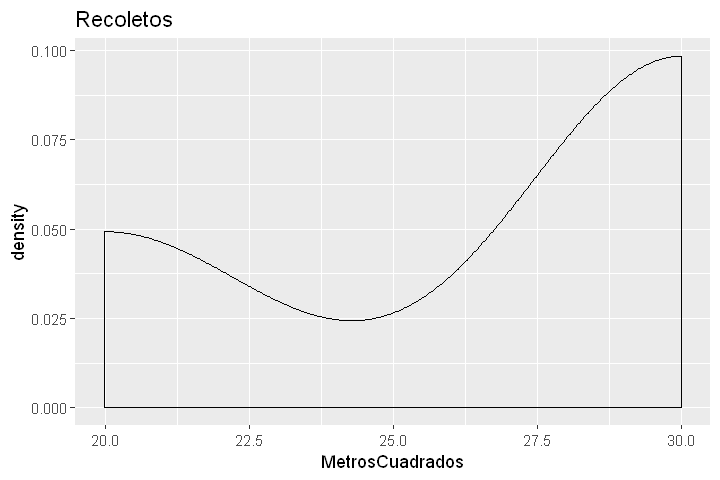

Warning message:
"Removed 641 rows containing non-finite values (stat_density)."

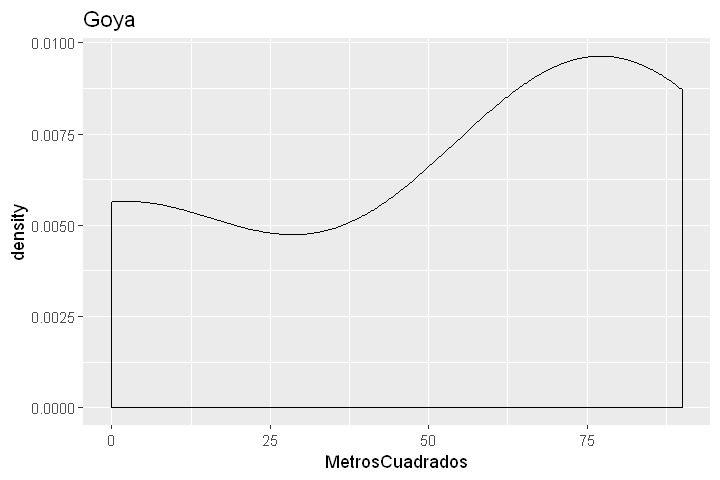

Warning message:
"Removed 216 rows containing non-finite values (stat_density)."

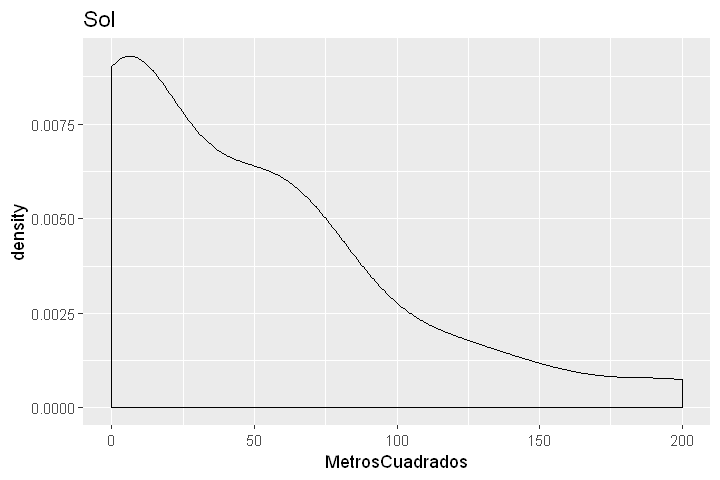

Warning message:
"Removed 517 rows containing non-finite values (stat_density)."

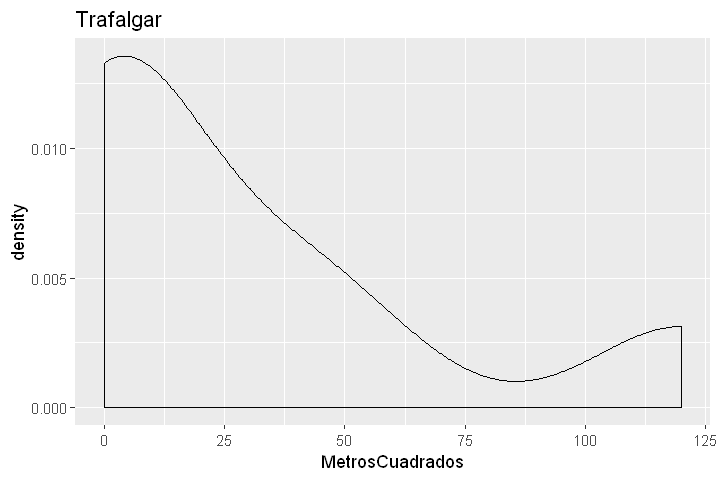

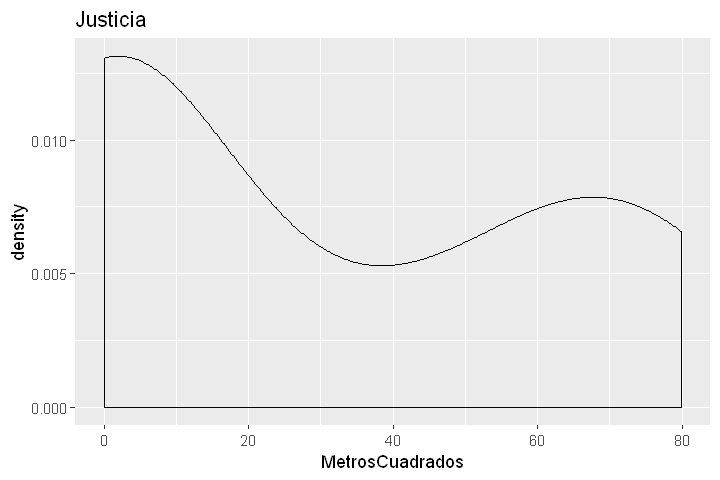

In [25]:
ggplot(Recoletos, aes(x = MetrosCuadrados)) + geom_density() + labs(title = 'Recoletos')

ggplot(Goya, aes(x = MetrosCuadrados)) + geom_density() + labs(title = 'Goya')

ggplot(Sol, aes(x = MetrosCuadrados)) + geom_density() + labs(title = 'Sol')

ggplot(Trafalgar, aes(x = MetrosCuadrados)) + geom_density() + labs(title = 'Trafalgar')

ggplot(Justicia, aes(x = MetrosCuadrados)) + geom_density() + labs(title = 'Justicia')

Esta claro que las medias de metros cuadrados de cada uno de estos 5 barrios parecen ser diferentes, pero ¿son estadísticamente diferentes?
¿Que test habría que usar para comprobarlo?

In [26]:
airbnb_entire_5Barrios <- airbnb_entire[airbnb_entire$Barrio %in% c('Recoletos', 'Goya', 'Sol', 'Trafalgar', 'Justicia'), ]
summary(aov(MetrosCuadrados ~ Barrio, data = airbnb_entire_5Barrios))

            Df Sum Sq Mean Sq F value Pr(>F)
Barrio       4   5832    1458   0.637  0.637
Residuals   85 194490    2288               
1645 observations deleted due to missingness

Como el p-value (0.637) es mayor de 0.05, se puede concluir que no hay diferencias estadísticamente significativas en cuanto a el tamano medio de alquiler, con un nivel de confianza del 95%.

Para únicamente los pisos de alquiler en el barrio de Sol:

``barrio_sol<-subset(airbnb_entire,Barrio=="Sol")``

Calcular un modelo lineal que combine alguna de estas variables:
* NumBanyos
* NumDormitorios
* MaxOcupantes
* MetrosCuadrados

In [27]:
barrio_sol<-subset(airbnb_entire,Barrio=="Sol")
modelo <- lm(Precio ~ NumBanyos + NumDormitorios + MaxOcupantes + MetrosCuadrados, data = barrio_sol)
modelo


Call:
lm(formula = Precio ~ NumBanyos + NumDormitorios + MaxOcupantes + 
    MetrosCuadrados, data = barrio_sol)

Coefficients:
    (Intercept)        NumBanyos   NumDormitorios     MaxOcupantes  
         42.287           15.709           22.753           -2.850  
MetrosCuadrados  
          0.299  


Primero calculamos la correlación para ver como se relacionan estas variables entre sí.

In [28]:
cor(barrio_sol[, c('Precio', 'NumBanyos', 'NumDormitorios', 'MaxOcupantes', 'MetrosCuadrados')], use = 'complete.obs')

,Precio,NumBanyos,NumDormitorios,MaxOcupantes,MetrosCuadrados
Precio,1.0000000,0.5975571,0.7160551,0.5269961,0.6381754
NumBanyos,0.5975571,1.0000000,0.6873719,0.7017290,0.4820549
NumDormitorios,0.7160551,0.6873719,1.0000000,0.7853809,0.5684521
MaxOcupantes,0.5269961,0.7017290,0.7853809,1.0000000,0.4286233
MetrosCuadrados,0.6381754,0.4820549,0.5684521,0.4286233,1.0000000


Se observa que la correlación entre el número de dormitorios y los metros cuadrados es sorprendentemente baja.
¿Son de fiar esos números?

Mediante un histograma o curvas de densidad podemos descartar números que notienen sentido en el dataframe barrio_sol,
para tener una matriz de correlación que tenga mayor sentido.


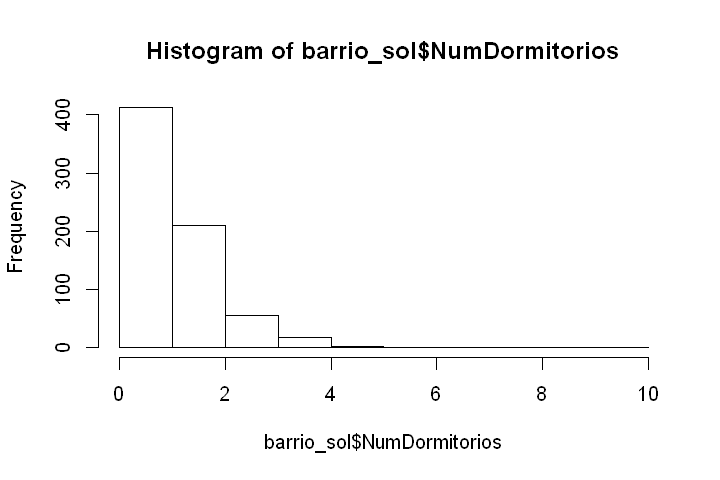

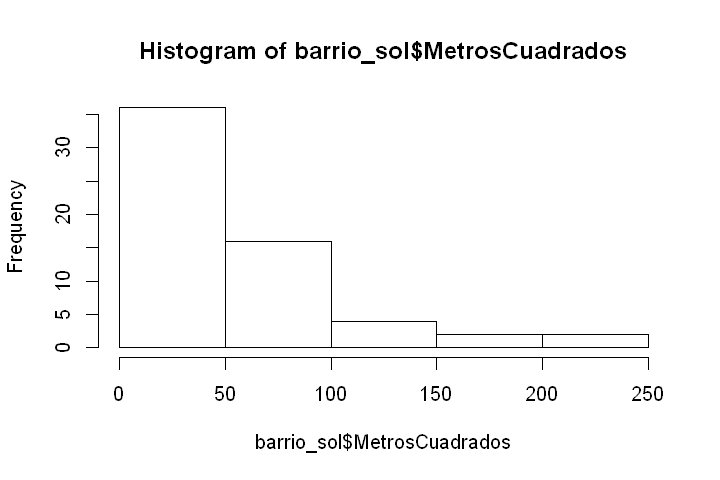

In [29]:
hist(barrio_sol$NumDormitorios)
hist(barrio_sol$MetrosCuadrados)

No son de Fiar:

In [30]:
barrio_sol2 <- barrio_sol[barrio_sol$MetrosCuadrados > 0 & barrio_sol$NumDormitorios > 0, ]
cor(barrio_sol2[, c('Precio', 'NumBanyos', 'NumDormitorios', 'MaxOcupantes', 'MetrosCuadrados')], use = 'complete.obs')

,Precio,NumBanyos,NumDormitorios,MaxOcupantes,MetrosCuadrados
Precio,1.0000000,0.6488283,0.8602538,0.7196760,0.7366345
NumBanyos,0.6488283,1.0000000,0.7427272,0.8518237,0.5581533
NumDormitorios,0.8602538,0.7427272,1.0000000,0.7913624,0.7844599
MaxOcupantes,0.7196760,0.8518237,0.7913624,1.0000000,0.7042954
MetrosCuadrados,0.7366345,0.5581533,0.7844599,0.7042954,1.0000000


Una vez que hayamos filtrado los datos correspondientes calcular el valor o la combinación de valores que mejor nos permite obtener el precio de un inmueble.

In [31]:
modelo <- lm(Precio ~ NumBanyos + NumDormitorios + MaxOcupantes + MetrosCuadrados, data = barrio_sol2)
modelo


Call:
lm(formula = Precio ~ NumBanyos + NumDormitorios + MaxOcupantes + 
    MetrosCuadrados, data = barrio_sol2)

Coefficients:
    (Intercept)        NumBanyos   NumDormitorios     MaxOcupantes  
        29.6212          -1.7754          34.1998           1.8490  
MetrosCuadrados  
         0.1552  


¿Que variable es más fiable para conocer el precio de un inmueble, el número de habitaciones o los metros cuadrados?

In [32]:
summary(modelo)


Call:
lm(formula = Precio ~ NumBanyos + NumDormitorios + MaxOcupantes + 
    MetrosCuadrados, data = barrio_sol2)

Residuals:
    Min      1Q  Median      3Q     Max 
-86.620 -15.106  -3.756  16.436  61.155 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      29.6212    11.4500   2.587 0.014597 *  
NumBanyos        -1.7754    14.2879  -0.124 0.901915    
NumDormitorios   34.1998     8.9016   3.842 0.000566 ***
MaxOcupantes      1.8490     4.2396   0.436 0.665773    
MetrosCuadrados   0.1552     0.1703   0.911 0.369085    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 30.48 on 31 degrees of freedom
  (558 observations deleted due to missingness)
Multiple R-squared:  0.7519,	Adjusted R-squared:  0.7199 
F-statistic: 23.49 on 4 and 31 DF,  p-value: 5.23e-09


NumDormitorios, el número de habitaciones, es la variable es más fiable para conocer el precio de un inmueble

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada metro cuadrado extra del piso?

In [33]:
confint(modelo)

,2.5 %,97.5 %
(Intercept),6.2688837,52.9735769
NumBanyos,-30.9157588,27.3650364
NumDormitorios,16.0447615,52.3547467
MaxOcupantes,-6.7977841,10.4957385
MetrosCuadrados,-0.1920824,0.5024867


El precio del alquiler se incrementa 0.1552 euros (intervalor de confianza: -0.1920824, 0.5024867) por cada metro cuadrado extra del piso

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada habitación?

El precio del alquiler incrementa 34.1998 euros (Intervalo de Confianza: 16.0447615 52.3547467) por cada habitación

¿Cual es la probabilidad de encontrar, en el barrio de Sol, un apartamento en alquiler con 3 dormitorios?
¿Cual es el intervalo de confianza de esa probabilidad?

In [34]:
sol.3dorm <- barrio_sol[barrio_sol$NumDormitorios == 3, ]
nrow(sol.3dorm)/nrow(barrio_sol)
binom.test(nrow(sol.3dorm),nrow(barrio_sol))

[1] 0.07845934


	Exact binomial test

data:  nrow(sol.3dorm) and nrow(barrio_sol)
number of successes = 55, number of trials = 701, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.0596506 0.1009033
sample estimates:
probability of success 
            0.07845934 
